In [1]:
# Fake News Detector - Project 3 by Kinga Kis


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [7]:
from google.colab import files
uploaded = files.upload()


Saving True.csv to True.csv
Saving Fake.csv to Fake (1).csv


In [8]:
import pandas as pd

fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

print("Fake news example:")
print(fake_df.head())

print("\nTrue news example:")
print(true_df.head())


Fake news example:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

True news example:
                                               title  \
0  As U.S. budget fight looms, Republicans fl

In [9]:
# Add labels: 0 = fake news, 1 = real news
fake_df["label"] = 0
true_df["label"] = 1

# Combine both datasets
data = pd.concat([fake_df, true_df], axis=0)

# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

# Keep only relevant columns
data = data[["title", "text", "label"]]

# Show a preview
print(data.head())


                                               title  \
0  Trump order to ease ban on political activity ...   
1   Zombie Reagan BLASTS Modern GOP For Obstructi...   
2  Trump aide plays down prospect of upending 'on...   
3  Senator Grassley not expecting imminent Suprem...   
4  Senate's McConnell: Draft healthcare bill expe...   

                                                text  label  
0  WASHINGTON (Reuters) - President Donald Trump ...      1  
1  Republicans have been vowing to honor the memo...      0  
2  WASHINGTON (Reuters) - President-elect Donald ...      1  
3  WASHINGTON (Reuters) - The head of the U.S. Se...      1  
4  WASHINGTON (Reuters) - U.S. Senate Republicans...      1  


In [10]:
import re
import string

# Function to clean the text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\[.*?\]', '', text)  # remove text in brackets
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove links
    text = re.sub(r'\@w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation again
    return text

# Apply to the text column
data['text'] = data['text'].apply(clean_text)

# Preview the cleaned data
print(data['text'].head())


0    washington reuters  president donald trump wil...
1    republicans have been vowing to honor the memo...
2    washington reuters  presidentelect donald trum...
3    washington reuters  the head of the us senate ...
4    washington reuters  us senate republicans will...
Name: text, dtype: object


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the max number of words and max sequence length
vocab_size = 10000
max_length = 200
trunc_type='post'
padding_type='post'
oov_token = "<OOV>"

# Initialize tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data['text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['text'])

# Pad the sequences to make them all the same length
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Prepare the labels
labels = data['label'].values


In [12]:
from sklearn.model_selection import train_test_split

# Split the padded sequences and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [18]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # fake or real
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)


Epoch 1/10
1123/1123 - 11s - 10ms/step - accuracy: 0.9546 - loss: 0.1261 - val_accuracy: 0.9923 - val_loss: 0.0269
Epoch 2/10
1123/1123 - 9s - 8ms/step - accuracy: 0.9946 - loss: 0.0216 - val_accuracy: 0.9951 - val_loss: 0.0168
Epoch 3/10
1123/1123 - 12s - 10ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9959 - val_loss: 0.0136
Epoch 4/10
1123/1123 - 10s - 8ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9962 - val_loss: 0.0136
Epoch 5/10
1123/1123 - 10s - 9ms/step - accuracy: 0.9977 - loss: 0.0118 - val_accuracy: 0.9953 - val_loss: 0.0162
Epoch 6/10
1123/1123 - 10s - 9ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9959 - val_loss: 0.0155
Epoch 7/10
1123/1123 - 8s - 8ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9840 - val_loss: 0.0512
Epoch 8/10
1123/1123 - 11s - 10ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9949 - val_loss: 0.0220
Epoch 9/10
1123/1123 - 10s - 9ms/step - accuracy: 0.9999 - loss: 4.9523e-04 - val_accur

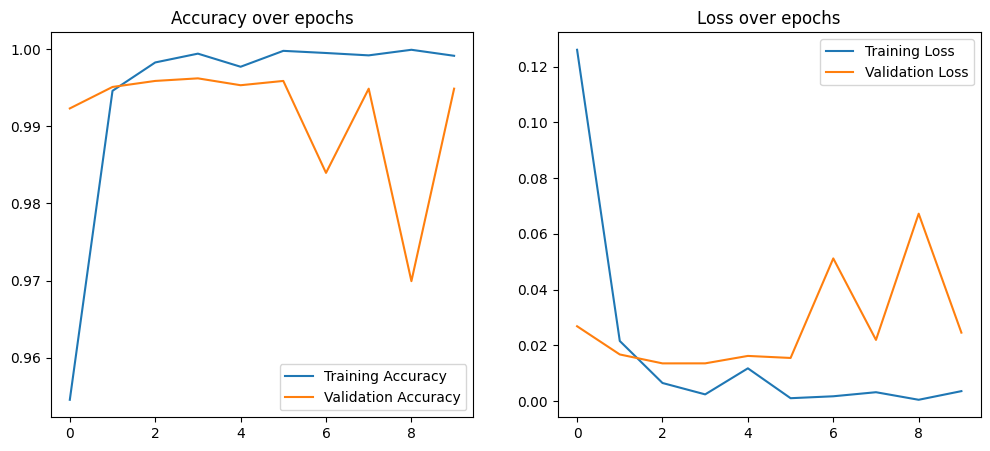

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss over epochs')
plt.show()


In [16]:
def predict_news(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length)
    pred = model.predict(padded)[0][0]
    label = "Real" if pred > 0.5 else "Fake"
    print(f"Prediction: {label} (confidence: {pred:.2f})")

predict_news("Breaking: Scientists discover new planet in our solar system")
predict_news("Obama caught smuggling illegal aliens into the country")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Fake (confidence: 0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Fake (confidence: 0.00)


In [17]:
predict_news("President signs new healthcare reform into law after Senate vote")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: Fake (confidence: 0.00)
